<a href="https://colab.research.google.com/github/arindamchattopadhyay/MachineLearning_May/blob/master/DeepLearningfor_handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
len(X_train)

60000

In [6]:

len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

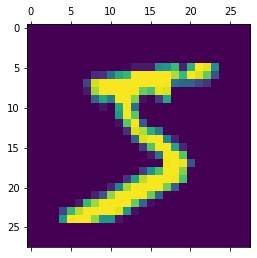

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
#How 're goin' to flatten the 2d Array? Using reshape
X_train_flattened= X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:

len(X_train_flattened[0])


784

In [27]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2798 - accuracy: 0.1668
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1121 - accuracy: 0.1987
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1048 - accuracy: 0.1990
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0994 - accuracy: 0.2019
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1012 - accuracy: 0.2016


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 3.4946 - accuracy: 0.3134


[3.4945597648620605, 0.313400000333786]

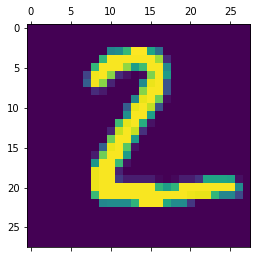

In [30]:
plt.matshow(X_test[1])

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]#Probabilty of 10 probablities of each digits and then choose the maximum score among the probabilities


array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0.], dtype=float32)

In [32]:
np.argmax(y_predicted[1])
#np.argmax finds a maximum element from an array and returns the index of it

2

In [33]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [34]:
y_predicted_labels[:5]#The first 5 digits of the corresponding test images

[5, 2, 1, 0, 2]

In [35]:
#Confusion matrix . y_test and y_predicted To get some understanding 
#about the accuracy of the model
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 949,    0,   22,    1,    0,    7,    0,    1,    0,    0],
       [   0, 1082,   52,    1,    0,    0,    0,    0,    0,    0],
       [  23,    0, 1009,    0,    0,    0,    0,    0,    0,    0],
       [  22,    0,  935,   52,    0,    1,    0,    0,    0,    0],
       [   2,    0,  971,    5,    4,    0,    0,    0,    0,    0],
       [  53,    3,  692,  121,    1,   22,    0,    0,    0,    0],
       [  80,    3,  875,    0,    0,    0,    0,    0,    0,    0],
       [   4,    2,  380,  184,   44,  398,    0,   16,    0,    0],
       [   8,    2,  963,    1,    0,    0,    0,    0,    0,    0],
       [   7,    6,  842,  111,   40,    3,    0,    0,    0,    0]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

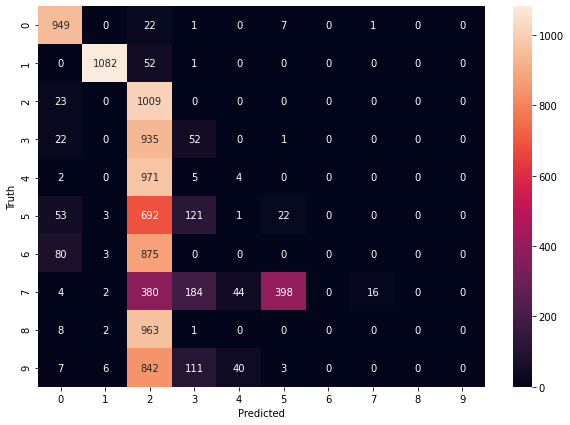

In [36]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
#Adding a hidden layer.
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.4077 - accuracy: 0.2387
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8606 - accuracy: 0.2511
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7704 - accuracy: 0.3586
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6985 - accuracy: 0.3829
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9432 - accuracy: 0.3978


In [38]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.0680 - accuracy: 0.3283


[2.068040370941162, 0.32829999923706055]

Text(69.0, 0.5, 'Truth')

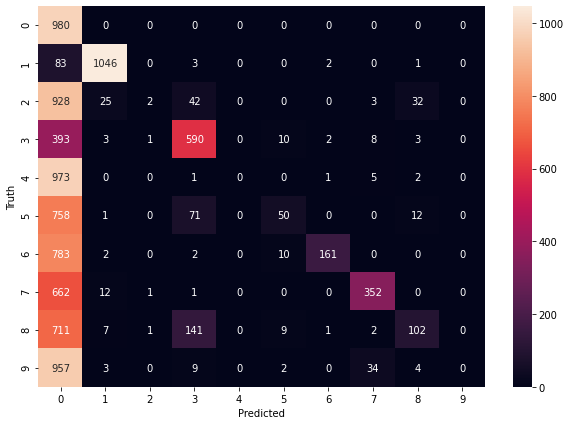

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.9182
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1371 - accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0988 - accuracy: 0.9705
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0614 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0499 - accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0422 - accuracy: 0.9872
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.024

In [42]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9750


[0.08375390619039536, 0.9750000238418579]

Text(69.0, 0.5, 'Truth')

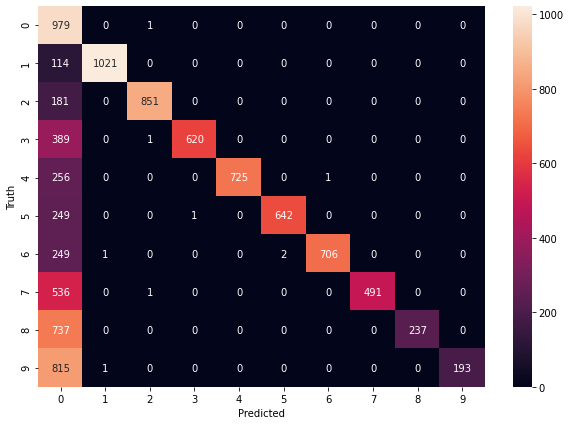

In [43]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')